<a href="https://colab.research.google.com/github/KesteHarshada87/ANN/blob/main/expt2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration 0: Cost = 0.2574, m = 0.0033, b = 0.0070
Iteration 100: Cost = 0.0494, m = 0.1593, b = 0.4061
Iteration 200: Cost = 0.0312, m = 0.1612, b = 0.5345
Iteration 300: Cost = 0.0267, m = 0.1249, b = 0.5901
Iteration 400: Cost = 0.0235, m = 0.0806, b = 0.6251
Iteration 500: Cost = 0.0207, m = 0.0363, b = 0.6534
Iteration 600: Cost = 0.0183, m = -0.0059, b = 0.6789
Iteration 700: Cost = 0.0162, m = -0.0458, b = 0.7024
Iteration 800: Cost = 0.0143, m = -0.0834, b = 0.7245
Iteration 900: Cost = 0.0126, m = -0.1186, b = 0.7452
Final values: Cost = 0.0111, m = -0.1515, b = 0.7645


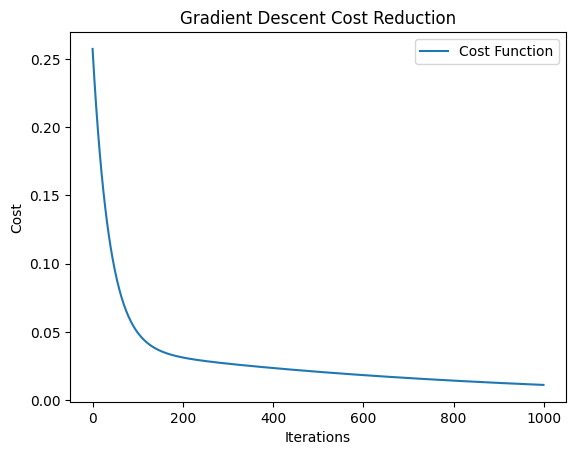

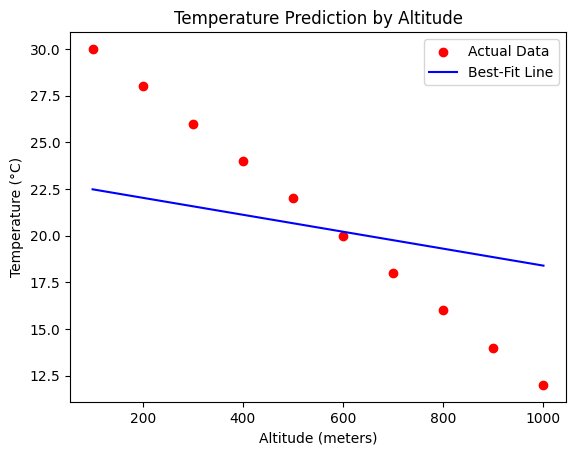

Final equation: y = -0.1515x + 0.7645
Predicted temperature at 750 meters: 19.53°C


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Sample dataset: Altitude (X) vs Temperature (Y)
X = np.array([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])  # Altitude in meters
Y = np.array([30, 28, 26, 24, 22, 20, 18, 16, 14, 12])  # Temperature in degrees Celsius

# Normalize X and Y for better convergence
X_normalized = X / max(X)
Y_normalized = Y / max(Y)

# Initialize parameters
m = 0  # Slope
b = 0  # Intercept
learning_rate = 0.005
iterations = 1000
n = len(X)  # Number of data points

def compute_cost(m, b, X, Y):
    predictions = m * X + b
    cost = (1 / (2 * n)) * np.sum((predictions - Y) ** 2)
    return cost

def gradient_descent(X, Y, m, b, learning_rate, iterations):
    cost_history = []
    for i in range(iterations):
        predictions = m * X + b
        dm = (-2 / n) * np.sum(X * (Y - predictions))
        db = (-2 / n) * np.sum(Y - predictions)

        m -= learning_rate * dm
        b -= learning_rate * db

        cost = compute_cost(m, b, X, Y)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}, m = {m:.4f}, b = {b:.4f}")

    return m, b, cost_history

# Train the model
m, b, cost_history = gradient_descent(X_normalized, Y_normalized, m, b, learning_rate, iterations)

# Print final values
print(f"Final values: Cost = {cost_history[-1]:.4f}, m = {m:.4f}, b = {b:.4f}")

# Plot cost function convergence
plt.plot(range(iterations), cost_history, label='Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent Cost Reduction')
plt.legend()
plt.show()

# Plot the best-fit line
plt.scatter(X, Y, color='red', label='Actual Data')
# Generate x values for the best-fit line
x_line = np.linspace(min(X), max(X), 100)
# Predict corresponding y values using the normalized model
y_line = (m * (x_line / max(X)) + b) * max(Y)
plt.plot(x_line, y_line, color='blue', label='Best-Fit Line')
plt.xlabel('Altitude (meters)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Prediction by Altitude')
plt.legend()
plt.show()

# Print final equation
print(f"Final equation: y = {m:.4f}x + {b:.4f}")

# Predict function
def predict(altitude):
    return (m * (altitude / max(X)) + b) * max(Y)

# Example Prediction
altitude_level = 750
predicted_temperature = predict(altitude_level)
print(f"Predicted temperature at {altitude_level} meters: {predicted_temperature:.2f}°C")
